# **분류 _ 기계시스템학부 2013075 박근영**


 2020년도 건강검진정보 샘플(1만건) 데이터를 이용히야 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 

(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성
   
(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 


(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  


(4) 코드는 github에 올리고 주소 제출



##**1-1) 데이터 파악하기**

In [8]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 패키지 사용하기 (pandas, seaborn, matplotlib)

In [1]:
%matplotlib inline
import pandas as pd                    # pandas
import matplotlib as mpl               # matplotlib 기본 설정
import matplotlib.pyplot as plt        # matplotlib 그래프 관련
import matplotlib.font_manager as fm   # matplotlib 폰트 관련
import seaborn as sns                  # seaborn 
mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 


-  폰트 설치하기

In [29]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/tru

In [2]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic Eco


In [3]:
 # 생략없이 모든 데이터의 열을 볼 수 있도록 설정한다.
pd.set_option('display.max_columns', None) 

# 2020년 건강검진정보 샘플을 불러온다
fpath = 'https://raw.githubusercontent.com/ykjoy/mining/main/health_data.csv'
df = pd.read_csv(fpath)

print(type(df))   # df의 자료형 출력
display(df)           # 변수 df에 저장되어 있는 데이터프레임 객체를 출력
                                 # iPython.display 를 이용하여 보기 좋게 출력
                    

<class 'pandas.core.frame.DataFrame'>


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,1,1,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


##**1-2) 데이터 조작하기**
- 레이블 인코딩
- 결측값 제거

In [4]:
df_new = df.copy()    # 복사본 만들기, df_new = df 를 사용하는 경우 이름만 다를 뿐 어느 한 쪽을 수정하면 다른 한 쪽도 같이 수정됨    
# 무의미한 변수 삭제
df_new.drop(columns='기준년도', inplace=True)
df_new.drop(columns='시력(좌)', inplace=True)
df_new.drop(columns='시력(우)', inplace=True)
df_new.drop(columns='청력(좌)', inplace=True)
df_new.drop(columns='청력(우)', inplace=True)
df_new.drop(columns='데이터공개일자', inplace=True)

# 변수 이름 변경
# ()가 들어가는 경우 변수의 오류가 많이 생기므로, 간단하게 변수명을 변경해주었음.
df_new = df_new.rename(columns  = {'연령대코드(5세단위)' :'연령대'})
df_new = df_new.rename(columns  = {'신장(5Cm단위)' :'신장'})
df_new = df_new.rename(columns  = {'체중(5Kg 단위)' :'체중'})
df_new = df_new.rename(columns  = {'식전혈당(공복혈당)' :'식전혈당'})
df_new = df_new.rename(columns  = {'(혈청지오티)AST' :'AST'})
df_new = df_new.rename(columns  = {'(혈청지오티)ALT' :'ALT'})


display(df_new)

,가입자일련번호,시도코드,성별코드,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,1,36,M,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,2,27,F,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,3,11,F,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,4,31,M,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,5,41,F,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,13,155,55,83.0,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN
9996,9997,43,F,11,160,55,77.5,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0
9997,9998,45,M,12,160,80,93.0,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN
9998,9999,27,F,15,155,55,78.0,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_new['성별코드'] = le.fit_transform(df_new['성별코드'])
df_new['흡연상태'] = le.fit_transform(df_new['흡연상태'])
df_new['음주여부'] = le.fit_transform(df_new['음주여부'])
# 카테고리형 변수를 수치형 변수로 변화 ( 레이블 인코딩 )
# 성별 남자 1 여자 0
# 흡연 상태 no 0 not now 1 yes2
# 음주 여부 no 0 yes 1
display(df_new)




,가입자일련번호,시도코드,성별코드,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,1,36,1,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,0,0,0,NaN,NaN
1,2,27,0,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,0,0,0,NaN,NaN
2,3,11,0,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,0,0,0,NaN,NaN
3,4,31,1,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,0,0,1,0.0,0.0
4,5,41,0,12,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,0,13,155,55,83.0,120.0,75.0,120.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,20.0,21.0,20.0,0,1,0,NaN,NaN
9996,9997,43,0,11,160,55,77.5,132.0,79.0,117.0,NaN,NaN,NaN,NaN,14.3,1.0,0.7,24.0,22.0,21.0,0,1,1,0.0,0.0
9997,9998,45,1,12,160,80,93.0,116.0,75.0,86.0,NaN,NaN,NaN,NaN,15.6,1.0,1.0,22.0,27.0,35.0,0,0,0,NaN,NaN
9998,9999,27,0,15,155,55,78.0,117.0,71.0,118.0,NaN,NaN,NaN,NaN,13.5,NaN,1.0,26.0,24.0,21.0,0,0,0,NaN,NaN


In [6]:
# 결측값 제거
df_test2 = df_new
df_test2 = df_test2.dropna()
display(df_test2)
df_test2.info()

,가입자일련번호,시도코드,성별코드,연령대,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
6,7,44,1,9,165,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,2,1,1,0.0,1.0
16,17,30,1,11,160,65,90.0,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,0,1,1,0.0,1.0
21,22,41,0,11,155,50,65.9,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0
27,28,11,1,17,155,60,82.0,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,0,1,1,0.0,0.0
47,48,26,1,16,165,65,94.0,110.0,72.0,114.0,199.0,106.0,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,9955,30,1,9,180,70,87.5,108.0,70.0,98.0,137.0,45.0,60.0,68.0,15.1,1.0,0.9,22.0,21.0,19.0,0,1,1,0.0,1.0
9963,9964,41,0,13,160,75,107.4,124.0,80.0,98.0,195.0,60.0,44.0,139.0,14.0,1.0,0.8,20.0,15.0,14.0,0,1,1,1.0,1.0
9965,9966,45,0,12,155,60,80.0,135.0,86.0,99.0,164.0,85.0,51.0,96.0,13.8,1.0,0.6,22.0,9.0,29.0,0,0,1,0.0,0.0
9967,9968,11,1,12,170,80,90.0,140.0,90.0,99.0,262.0,250.0,60.0,152.0,15.0,1.0,0.7,27.0,36.0,66.0,1,1,1,0.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가입자일련번호   1249 non-null   int64  
 1   시도코드      1249 non-null   int64  
 2   성별코드      1249 non-null   int64  
 3   연령대       1249 non-null   int64  
 4   신장        1249 non-null   int64  
 5   체중        1249 non-null   int64  
 6   허리둘레      1249 non-null   float64
 7   수축기혈압     1249 non-null   float64
 8   이완기혈압     1249 non-null   float64
 9   식전혈당      1249 non-null   float64
 10  총콜레스테롤    1249 non-null   float64
 11  트리글리세라이드  1249 non-null   float64
 12  HDL콜레스테롤  1249 non-null   float64
 13  LDL콜레스테롤  1249 non-null   float64
 14  혈색소       1249 non-null   float64
 15  요단백       1249 non-null   float64
 16  혈청크레아티닌   1249 non-null   float64
 17  AST       1249 non-null   float64
 18  ALT       1249 non-null   float64
 19  감마지티피     1249 non-null   float64
 20  흡연상태      1249 non-null   int6

**>>>결측값과 데이터의 타입이 분류하기에 적합한 것을 확인 할 수 있다.**

1) 결측값이 없다.

2) 데이터의 타입이 모두 int혹은 float로 변경되었다.

##**1-3) 데이터 탐색하기**

In [10]:
import mglearn

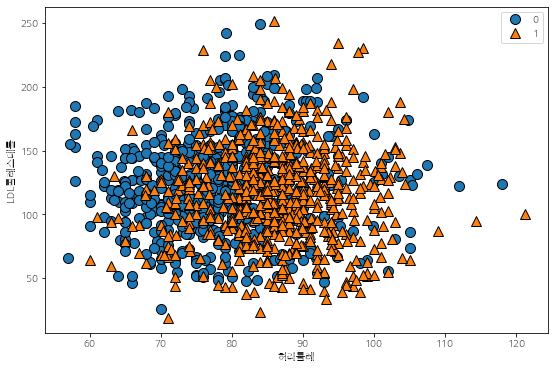

In [32]:
mglearn.discrete_scatter(df_test2['허리둘레'], df_test2['LDL콜레스테롤'], df_test2['성별코드'])
plt.xlabel("허리둘레")
plt.ylabel("LDL콜레스테롤")
plt.legend()
plt.show()

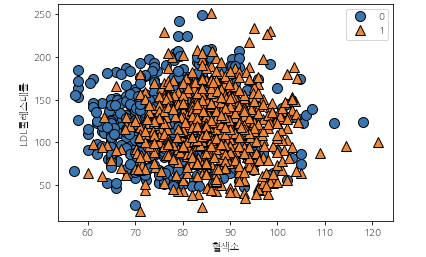

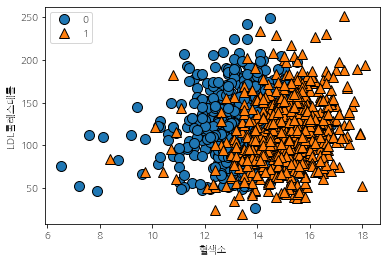

In [12]:
mglearn.discrete_scatter(df_test2['혈색소'], df_test2['LDL콜레스테롤'], df_test2['성별코드'])
plt.xlabel("혈색소")
plt.ylabel("LDL콜레스테롤")
plt.legend()
plt.show()

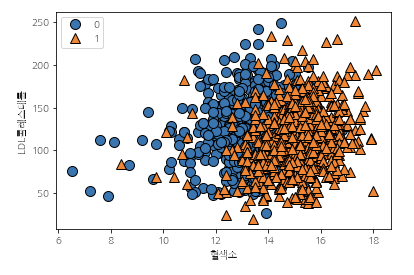

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**>>> 성별코드, LDL 콜레스테롤, 혈색소, 허리둘레가 중요 변수일 것으로 예상된다.**

또한, 독립 변수는 가입자일련번호, 시도코드, 시력, 청력, 데이터공개일자이고, 나머지 모든 변수는 종속 변수이다.

## 2) Classification model1 : Decision tree



In [14]:
X = df_test2.drop(['가입자일련번호','시도코드','성별코드','신장'],axis =1)
X.head()

,연령대,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
6,9,80,93.0,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,2,1,1,0.0,1.0
16,11,65,90.0,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,0,1,1,0.0,1.0
21,11,50,65.9,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0
27,17,60,82.0,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,0,1,1,0.0,0.0
47,16,65,94.0,110.0,72.0,114.0,199.0,106.0,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0


In [15]:
import numpy as np
y = df_test2['성별코드']
np.bincount(y)


array([572, 677])

In [16]:
# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1,stratify =y )

tree = DecisionTreeClassifier(criterion = 'gini',max_depth=None,random_state=1)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.907


In [18]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.932
시험용 데이터 정확도: 0.941


In [19]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.07224773 0.         0.04227184 0.         0.
 0.         0.         0.         0.         0.25212286 0.
 0.07298232 0.00579215 0.         0.00245508 0.55212802 0.
 0.         0.         0.        ]


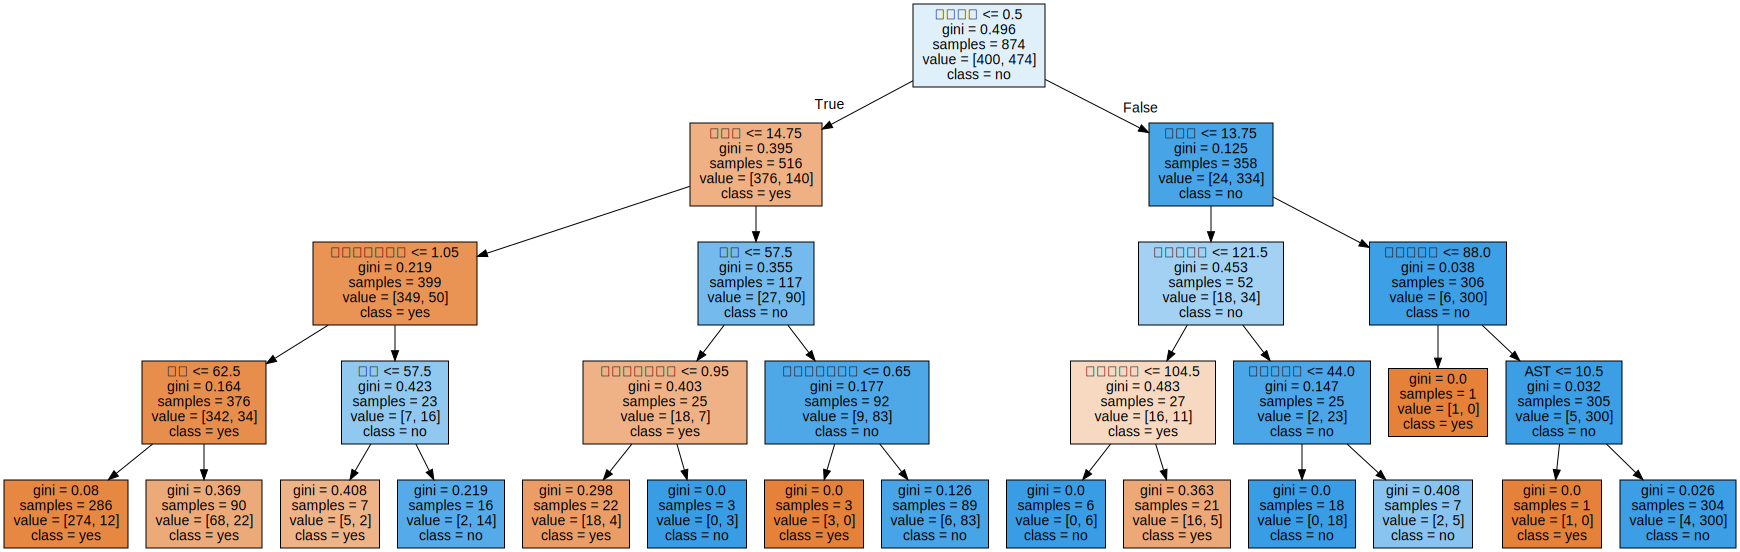

In [20]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "yes", "no"],
                feature_names=X.columns.tolist(), filled=True)

#graph = graph_from_dot_data(dot_data)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

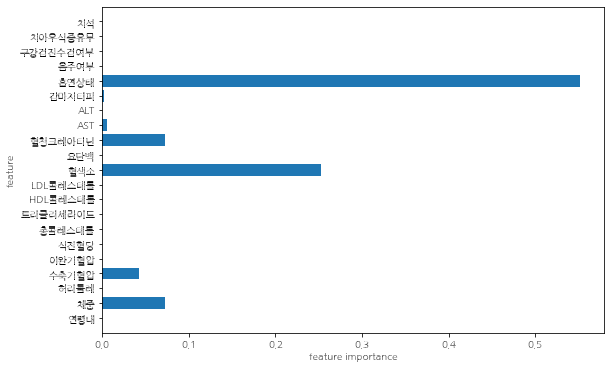

In [21]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns.tolist())  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features),X.columns.tolist())  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 

plot_feature_importances_wisc(tree)

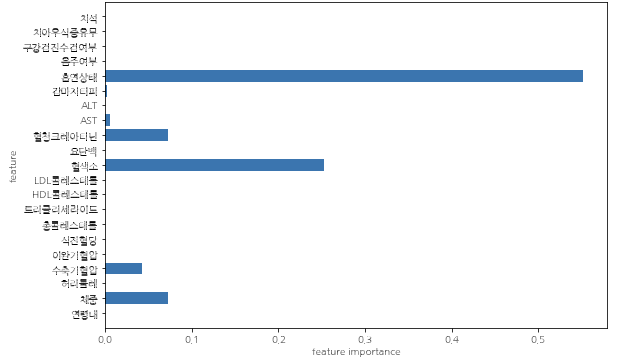

In [22]:
res = pd.DataFrame(result)
res["name"] = X.columns.tolist()
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
 1   name    21 non-null     object 
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


None

,0,name
14,0.000000,ALT
13,0.005792,AST
8,0.000000,HDL콜레스테롤
9,0.000000,LDL콜레스테롤
15,0.002455,감마지티피
18,0.000000,구강검진수검여부
3,0.042272,수축기혈압
5,0.000000,식전혈당
0,0.000000,연령대
11,0.000000,요단백


## 3) Classification model2 : Ensemble model- Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.939


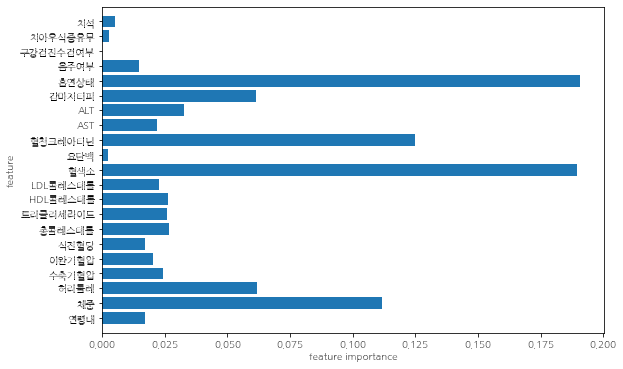

In [24]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_wisc(forest)

## 4) Classification model3 : Ensemble model- Gradient Boosting:

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.986
시험용 데이터 세트 정확도: 0.947


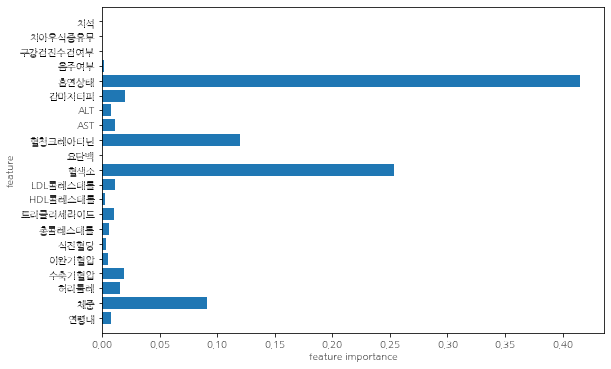

In [26]:
plot_feature_importances_wisc(gbrt)

## 5) Evalution : Cross validation

In [27]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')  

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("GradientBoosting: ", gbrt_scores) 


print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("GradientBoosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.94318182 0.93181818 0.96590909 0.875      0.86206897 0.87356322
 0.86206897 0.88505747 0.91954023 0.91954023]
Random forest:  [0.94318182 0.93181818 0.94318182 0.88636364 0.90804598 0.93103448
 0.89655172 0.90804598 0.94252874 0.94252874]
GradientBoosting:  [0.90909091 0.92045455 0.95454545 0.88636364 0.93103448 0.88505747
 0.89655172 0.90804598 0.95402299 0.94252874]
Accuracy mean
Decision tree :0.904
Random forest :0.923
GradientBoosting :0.919


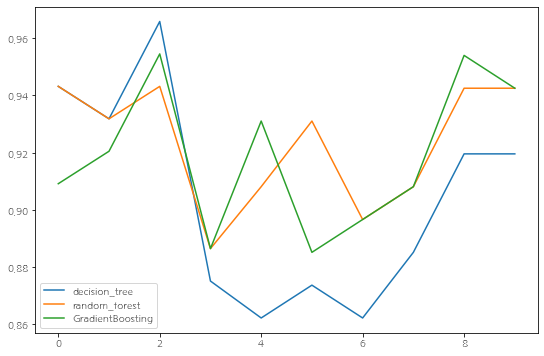

In [29]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['GradientBoosting',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

**교차검증에 의하면 랜덤포레스트가 정확도 0.923로 가장 높았다.**

**>>>그래서, 세 가지 모델 중 가장 최적의 분류 모델은 랜덤포레스트이다.**

>또한, 중요변수는 성별코드를 제외한 변수 중에서는 흡연 상태, 혈색소, 체중, 혈창크레아티닌, 수축기혈압, AST순으로 중요도가 나타났다. 이외의 나머지 변수는 중요도가 0으로 나타났다.